In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

### Loading the data

In [18]:
data = pd.read_excel("BlinkIT Grocery Data.xlsx")

In [19]:
data.head()

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,5.0
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,5.0
2,Regular,FDR28,Frozen Foods,2016,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0
3,Regular,FDL50,Canned,2014,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,5.0
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.60,55.1614,5.0


In [20]:
data.shape

(8523, 12)

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item Fat Content           8523 non-null   object 
 1   Item Identifier            8523 non-null   object 
 2   Item Type                  8523 non-null   object 
 3   Outlet Establishment Year  8523 non-null   int64  
 4   Outlet Identifier          8523 non-null   object 
 5   Outlet Location Type       8523 non-null   object 
 6   Outlet Size                8523 non-null   object 
 7   Outlet Type                8523 non-null   object 
 8   Item Visibility            8523 non-null   float64
 9   Item Weight                7060 non-null   float64
 10  Sales                      8523 non-null   float64
 11  Rating                     8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


### Checking null values

In [22]:
data.isna().sum()

Item Fat Content                0
Item Identifier                 0
Item Type                       0
Outlet Establishment Year       0
Outlet Identifier               0
Outlet Location Type            0
Outlet Size                     0
Outlet Type                     0
Item Visibility                 0
Item Weight                  1463
Sales                           0
Rating                          0
dtype: int64

- Item Weight feature have 1463 nall values

### Distribution of Item Weight

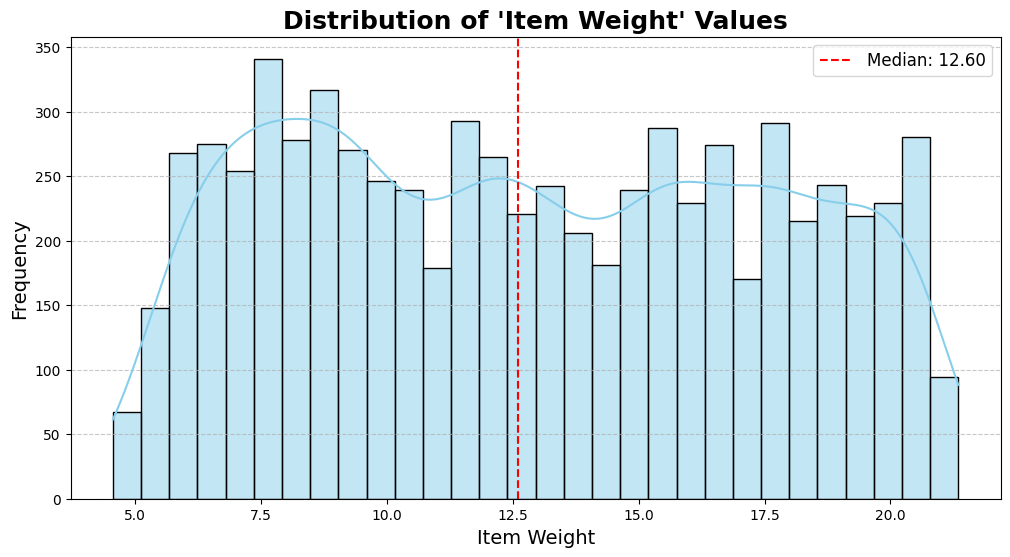

In [23]:
plt.figure(figsize=(12, 6))
sns.histplot(data['Item Weight'], kde=True, bins=30, color="skyblue", edgecolor="black")
plt.axvline(data['Item Weight'].median(), color="red", linestyle="--", label=f"Median: {data['Item Weight'].median():.2f}")
plt.title("Distribution of 'Item Weight' Values", fontsize=18, fontweight="bold")
plt.xlabel("Item Weight", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.legend(fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

### Boxplot of 'Item Weight' vs Item Fat Content

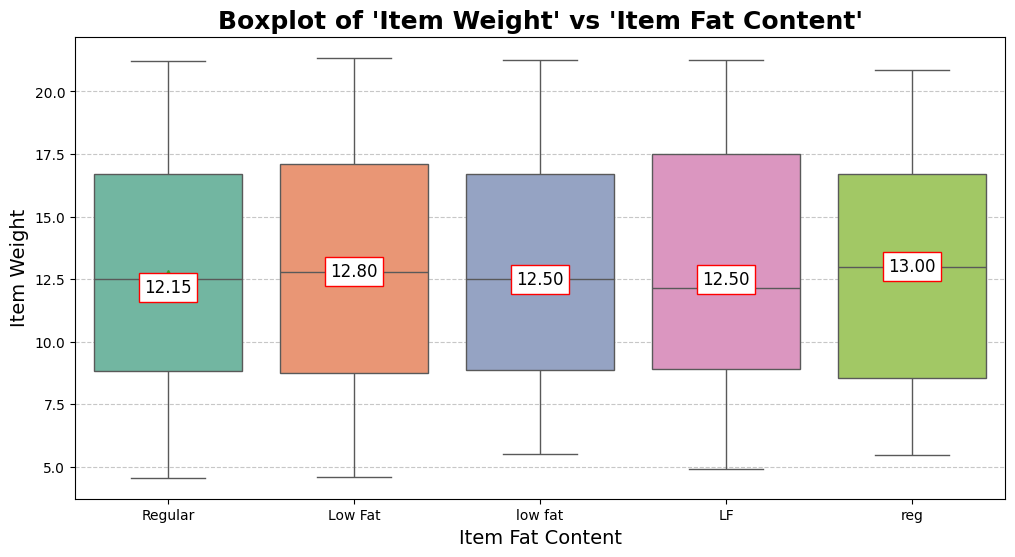

In [24]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='Item Fat Content', y='Item Weight', palette="Set2", showmeans=True, 
            meanprops={"linestyle":"--", "color":"red"})
medians = data.groupby('Item Fat Content')['Item Weight'].median()
for i, median in enumerate(medians):
    plt.text(i, median, f"{median:.2f}", ha='center', va='center', fontsize=12, color="black", bbox=dict(facecolor="white", edgecolor="red"))
plt.title("Boxplot of 'Item Weight' vs 'Item Fat Content'", fontsize=18, fontweight="bold")
plt.xlabel("Item Fat Content", fontsize=14)
plt.ylabel("Item Weight", fontsize=14)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

- different fat content categories have different Item weight
- we will use this feature  to impute the null values of item weight
---

### Function to impute the null values

In [25]:
def impute_item_weight(cols):
    fat_content = cols[1]
    Item_weight = cols[0]
    
    if pd.isnull(Item_weight):
        
        if fat_content == 'Regular':
            return 12.15
        
        elif fat_content == 'Low Fat':
            return 12.80
        
        elif fat_content == 'low fat':
            return 12.50
        
        elif fat_content == 'LF':
            return 12.50
        
        else:
            return 13
        
    else:
        return Item_weight

In [26]:
data['Item Weight'] = data[['Item Weight', 'Item Fat Content']].apply(impute_item_weight,axis = 1)

In [27]:
data.isnull().sum()

Item Fat Content             0
Item Identifier              0
Item Type                    0
Outlet Establishment Year    0
Outlet Identifier            0
Outlet Location Type         0
Outlet Size                  0
Outlet Type                  0
Item Visibility              0
Item Weight                  0
Sales                        0
Rating                       0
dtype: int64

- null values imputed successfullly
---